<a href="https://colab.research.google.com/github/GuysBarash/Genetic-programing-with-DEAP/blob/master/Bayesian_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [299]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from scipy.optimize import minimize_scalar
from scipy.stats import beta
from scipy.stats import binom
from scipy.stats import bernoulli

from matplotlib import animation
from IPython.display import HTML, clear_output
from matplotlib import rc

matplotlib.use('Agg')

In [300]:
agent_truth_p = 0.88 #@param {type: "slider", min: 0.0, max: 1.0, step:0.01}

repeats = 700
starting_guess_for_b = 1
starting_guess_for_a = 1

# Example

In [301]:
def plotPrior(a, b):
  fig = plt.figure()
  ax = plt.axes()
  plt.xlim(0, 1)
  x = np.linspace(0, 1, 1000)
  y = beta.pdf(x, a, b)
  x_guess = x[y.argmax()]
  ax.plot(x, y);

  maximal_point = ax.axvline(x=x_guess, label=f'Best guess for prior: {x_guess:>.2f}');
  ax.legend();
  return

The agent has a chance of "p" of telling the truth, and a chance of 1-p of randomly selecting an answer

In [302]:
def agentDecision(real_answer,options,agent_truth_p):
    choice = bernoulli.rvs(agent_truth_p)
    if choice == 1:
        return real_answer
    else:
        choice = bernoulli.rvs(0.5)
        if choice == 1:
            return options[0]
        else:
            return options[1]

In [303]:
b = starting_guess_for_b
a = starting_guess_for_a

Prior before any testing takes place. You can see it's balanced.

p =  0.5


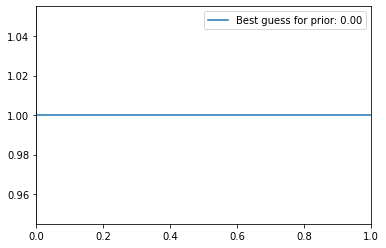

In [304]:
print("p = ", a / (a + b))
plotPrior(a, b)

In [305]:

agent_log = pd.DataFrame(index=range(repeats),columns=['a','b','Real type','Agent answer','Agent is correct'])
data_validity_types = ["BAD","GOOD"]

In [306]:
for i in range(repeats):
  data_is_valid = np.random.choice(data_validity_types)
  agent_response_on_the_data = agentDecision(data_is_valid,data_validity_types,agent_truth_p)
  agent_is_correct = data_is_valid == agent_response_on_the_data
  agent_log.loc[i,['Real type','Agent answer','Agent is correct']] = data_is_valid, agent_response_on_the_data, agent_is_correct

  # a and b update dynamically each step
  a += int(agent_is_correct)
  b += int(not agent_is_correct)
  agent_log.loc[i,['a','b']] = a, b

In [307]:
correct_answers = agent_log['Agent is correct'].sum()
total_answers = agent_log['Agent is correct'].count()
percentage = 0
if total_answers > 0:
  percentage = float(correct_answers) / total_answers
print(f"Agent was right {correct_answers}/{total_answers} ({100 * percentage:>.2f} %) of the times.")

Agent was right 662/700 (94.57 %) of the times.


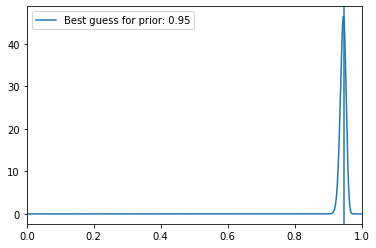

In [308]:
plotPrior(a, b)

# Dynamic example

In [309]:
# create a figure and axes
fig = plt.figure(figsize=(12,5));
ax = plt.subplot(1,1,1);

# set up the subplots as needed
ax.set_xlim(( 0, 1));            
ax.set_ylim((0, 10));

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax.set_title('');
maximal_point = ax.axvline(x=0, label='line at x = {}'.format(0));
line1, = ax.plot([], [], 'b', lw=2);     # ax.plot returns a list of 2D line objects
clear_output()
plt.close('all')

In [ ]:

def getPriorFrame(frame_n):
  global agent_log

  a = agent_log.loc[frame_n,'a']
  b = agent_log.loc[frame_n,'b']
  x = np.linspace(0, 1, 1000)
  y = beta.pdf(x, a, b)
  x_guess = x[y.argmax()]
  ax.legend()
  maximal_point.set_xdata(x_guess)
  maximal_point.set_label(f'Best guess for prior: {x_guess:>.2f}')

  line1.set_data(x, y)
  txt_title.set_text(f'Agent step = {frame_n:4d}, a = {a}, b= {b}')
  return line1,

num_of_steps = 50
frames =[0]+ list(range(0, len(agent_log), int(len(agent_log) / num_of_steps))) + [agent_log.index[-1]]
ani = animation.FuncAnimation(fig, getPriorFrame, frames,
                              interval=100, blit=True)
rc('animation', html='html5')
ani